# Análise de crédito com IA: prevendo default no cartão de crédito com ML

In [28]:
# Bibliotecas

import os
import warnings
import mplcyberpunk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from feature_engine import transformation as vt
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE


# Dataset

Este dataset que será trabalhado se trata de dados a respeito do comportamento do consumidor tomador de crédito tailandês. São mais de 9000 consumidores acompanhandos por um período de seis meses. 

## 1. Preparação do Dataset

* `ID`: Identificação de cada cliente.
* `LIMIT_BAL`: Montante do crédito concedido em dólares taiwaneses.
* `SEX`: Gênero (1=masculino, 2=feminino).
* `EDUCATION`: Nível educacional (1=pós-graduação, 2=universidade, 3=ensino médio, 4=outros).
* `MARRIAGE`: Estado civil (1=casado, 2=solteiro, 3=outros).
* `AGE`: Idade em anos.
* `PAY_0` a `PAY_6`: Histórico de pagamentos dos últimos meses.
* `BILL_AMT1` a `BILL_AMT6`: Valores das faturas nos últimos meses.
* `PAY_AMT1` a `PAY_AMT6`: Valores dos pagamentos realizados nos últimos meses.

Das variáveis de comportamento do consumidor, suas descrições são:

* `PAY_0` - Status de pagamento de setembro
-2 - Sem consumo
-1 - pagou devidamente
0 - Usou de crédito rotativo
1 - atraso de um mês no pagamento
2 - atraso de pagamento de dois meses
3 - atraso de três meses no pagamento
8 - atraso de pagamento de oito meses
9 - atraso de pagamento por nove meses ou mais
* `PAY_2` - status de pagamento de agosto (mesmo código)
* `PAY_3` - status de reembolso de julho (mesmo código)
* `PAY_4` - Status de reembolso de junho (mesmo código)
* `PAY_5` - Status de reembolso de maio (mesmo código)
* `PAY_6` - Status de reembolso de abril (mesmo código)
* `BILL_AMT1` - Extrato da fatura de setembro
* `BILL_AMT2` - Extrato da fatura de agosto
* `BILL_AMT3` - Extrato da fatura de julho
* `BILL_AMT4` - Extrato da fatura de junho
* `BILL_AMT5` - Extrato da fatura de maio
* `BIll_AMT6` - Extrato da fatura de abril
* `PAY_AMT1` - Valor do pagamento em setembro referente a agosto
* `PAY_AMT2` - Valor do pagamento em agosto referente a setembro
* `PAY_AMT3` - “” “” “” “” “” “” julho
* `PAY_AMT4` - “” “” “” “” “” “” “” Junho
* `PAY_AMT5` - “” “” “” “” “” “” “” Maio
* `PAY_AMT6` - “” “” “” “” “” “” “” abril

In [2]:
os.chdir

<function nt.chdir(path)>

In [ ]:
caminho_dados = r'.\data'
os.chdir = caminho_dados
dados_credito = pd.read_csv("dados_cartao_credito.csv")
dados_credito = dados_credito.set_index('ID')
dados_credito

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


## Análise exploratória e tratamentodos dados

A primeira coisa que será realizada é trocar o nome das colunas para nomes mais expressivos e familiares

In [4]:
dados_credito = dados_credito.rename(columns={
    'LIMIT_BAL': 'limite_do_cartao',
    'SEX' : 'sexo',
    'EDUCATION' : 'escolaridade',
    'MARRIAGE' : 'estado_civil',
    'AGE' : 'idade',
    'PAY_0' : 'status_pagamento_setembro',
    'PAY_2' : 'status_pagamento_agosto',
    'PAY_3' : 'status_pagamento_julho',
    'PAY_4' : 'status_pagamento_junho',
    'PAY_5' : 'status_pagamento_maio',
    'PAY_6' : 'status_pagamento_abril',
    'BILL_AMT1': 'extrato_fatura_setembro',
    'BILL_AMT2' : 'extrato_fatura_agosto',
    'BILL_AMT3' : 'extrato_fatura_julho',
    'BILL_AMT4' : 'extrato_fatura_junho',
    'BILL_AMT5' : 'extrato_fatura_maio',
    'BILL_AMT6': 'extrato_fatura_abril',
    'PAY_AMT1' : 'valor_do_pgmt_setembro_compt_ago',
    'PAY_AMT2' : 'valor_do_pgmt_ago_compt_set',
    'PAY_AMT3' : 'valor_do_pgmt_ago_compt_jul',
    'PAY_AMT4' : 'valor_do_pgmt_jul_compt_jun',
    'PAY_AMT5' : 'valor_do_pgmt_jun_compt_mai',
    'PAY_AMT6' : 'valor_do_pgmt_mai_compt_abr',
    'default.payment.next.month' : 'ira_dar_default'
})

dados_credito

,limite_do_cartao,sexo,escolaridade,estado_civil,idade,status_pagamento_setembro,status_pagamento_agosto,status_pagamento_julho,status_pagamento_junho,status_pagamento_maio,...,extrato_fatura_junho,extrato_fatura_maio,extrato_fatura_abril,valor_do_pgmt_setembro_compt_ago,valor_do_pgmt_ago_compt_set,valor_do_pgmt_ago_compt_jul,valor_do_pgmt_jul_compt_jun,valor_do_pgmt_jun_compt_mai,valor_do_pgmt_mai_compt_abr,ira_dar_default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [5]:
# checando presença de valores ausentes

dados_credito.isnull().sum()

limite_do_cartao                    0
sexo                                0
escolaridade                        0
estado_civil                        0
idade                               0
status_pagamento_setembro           0
status_pagamento_agosto             0
status_pagamento_julho              0
status_pagamento_junho              0
status_pagamento_maio               0
status_pagamento_abril              0
extrato_fatura_setembro             0
extrato_fatura_agosto               0
extrato_fatura_julho                0
extrato_fatura_junho                0
extrato_fatura_maio                 0
extrato_fatura_abril                0
valor_do_pgmt_setembro_compt_ago    0
valor_do_pgmt_ago_compt_set         0
valor_do_pgmt_ago_compt_jul         0
valor_do_pgmt_jul_compt_jun         0
valor_do_pgmt_jun_compt_mai         0
valor_do_pgmt_mai_compt_abr         0
ira_dar_default                     0
dtype: int64

Não há valores ausentes no nosso dataset.
Logo, é possível visualizar as estatísticas descritivas dos dados sem um tratamento prévio.
Mostraremos agora somente as estatísticas referentes às variáveis numéricas não binárias.

In [6]:
dados_nao_binario_de_credito = dados_credito[['limite_do_cartao', 'idade', 'extrato_fatura_setembro', 'extrato_fatura_agosto',
                                              'extrato_fatura_julho', 'extrato_fatura_junho', 'extrato_fatura_maio',
                                              'extrato_fatura_abril', 'valor_do_pgmt_setembro_compt_ago',
                                               'valor_do_pgmt_ago_compt_set', 'valor_do_pgmt_ago_compt_jul',
                                                'valor_do_pgmt_jul_compt_jun', 'valor_do_pgmt_jun_compt_mai',
                                                  'valor_do_pgmt_mai_compt_abr']]

round(dados_nao_binario_de_credito.describe(include='number'), 2)

,limite_do_cartao,idade,extrato_fatura_setembro,extrato_fatura_agosto,extrato_fatura_julho,extrato_fatura_junho,extrato_fatura_maio,extrato_fatura_abril,valor_do_pgmt_setembro_compt_ago,valor_do_pgmt_ago_compt_set,valor_do_pgmt_ago_compt_jul,valor_do_pgmt_jul_compt_jun,valor_do_pgmt_jun_compt_mai,valor_do_pgmt_mai_compt_abr
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,35.49,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50
std,129747.66,9.22,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47
min,10000.00,21.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,28.00,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75
50%,140000.00,34.00,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
75%,240000.00,41.00,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00
max,1000000.00,79.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00


Analisando a mediana do valor de pagamento das faturas de cartão de crédito de abril a setembro, há uma consistência nos fluxos de pagamento. Porém há outliars, como um cliente que pagou 873,552.00 de fatura em setembro, indicando ser um cliente de mais alta renda. A idade mínima é 21 e a máxima é 79 anos. A mediana de idade está em 28 anos, com um desvio padrão de 9 anos. Uma distribuição de idade interessante, mostrando que a maioria dos clientes está em idade ativa para trabalhar. Será também investigado se há alguma correlação entre default e a idade.

Conforme este grafico de barras a seguir, é possível ver a distribuição de quem irá e quem não irá dar default. Notavalmente, a maiora não dá default. Um desbalanceamento de quase 80%.


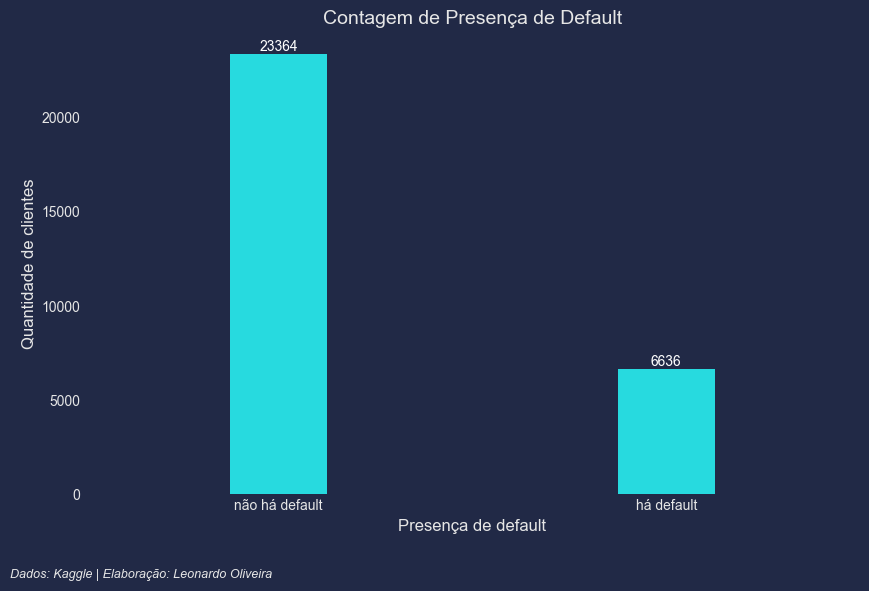

In [66]:
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ira_dar_default', data=dados_credito, width= 0.25)

# Customizar o gráfico
plt.xticks([0, 1], ['não há default', 'há default'])  # Alterar os rótulos do eixo x
plt.xlabel("Presença de default", fontsize=12)        
plt.ylabel("Quantidade de clientes", fontsize=12)     
plt.title("Contagem de Presença de Default", fontsize=14)  #
plt.grid(False)

for p in ax.patches:
    
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5), textcoords= 'offset points', fontsize = 10, color = 'white'
                )

plt.figtext(0.05, -0.03, "Dados: Kaggle | Elaboração: Leonardo Oliveira", ha="left", fontsize=9, style="italic")


plt.show()


Explorando a coluna de sexo, é possível notar a maior presença de mulheres em nossa amostra também 

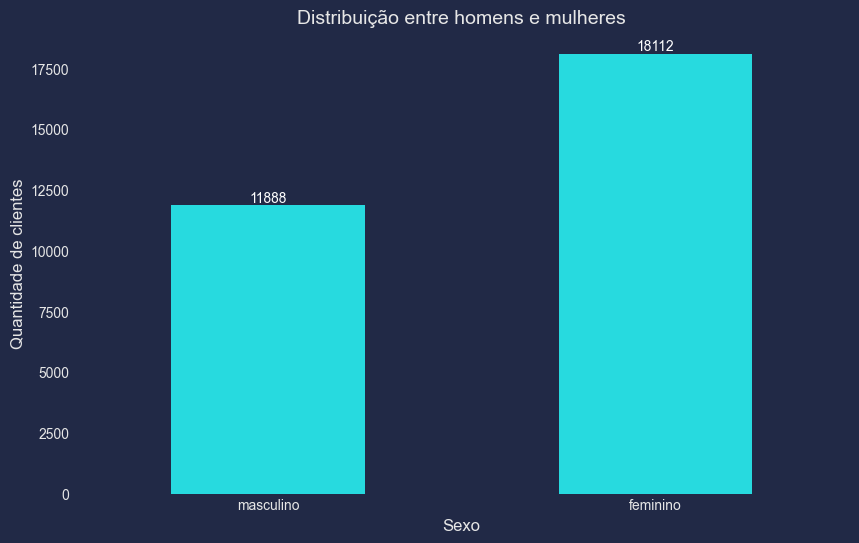

In [8]:
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sexo', data=dados_credito, width= 0.5)

# Customizar o gráfico
plt.xticks([0, 1], ['masculino', 'feminino'])  # Alterar os rótulos do eixo x
plt.xlabel("Sexo", fontsize=12)        
plt.ylabel("Quantidade de clientes", fontsize=12)     
plt.title("Distribuição entre homens e mulheres", fontsize=14)  #
plt.grid(False)

for p in ax.patches:
    
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5), textcoords= 'offset points', fontsize = 10, color = 'white'
                )

plt.show()


In [9]:
dados_credito['sexo'].value_counts()

sexo
2    18112
1    11888
Name: count, dtype: int64

E a seguir vamos identificar a distribuição da amostra para a variável de limite de cartão de crédito.

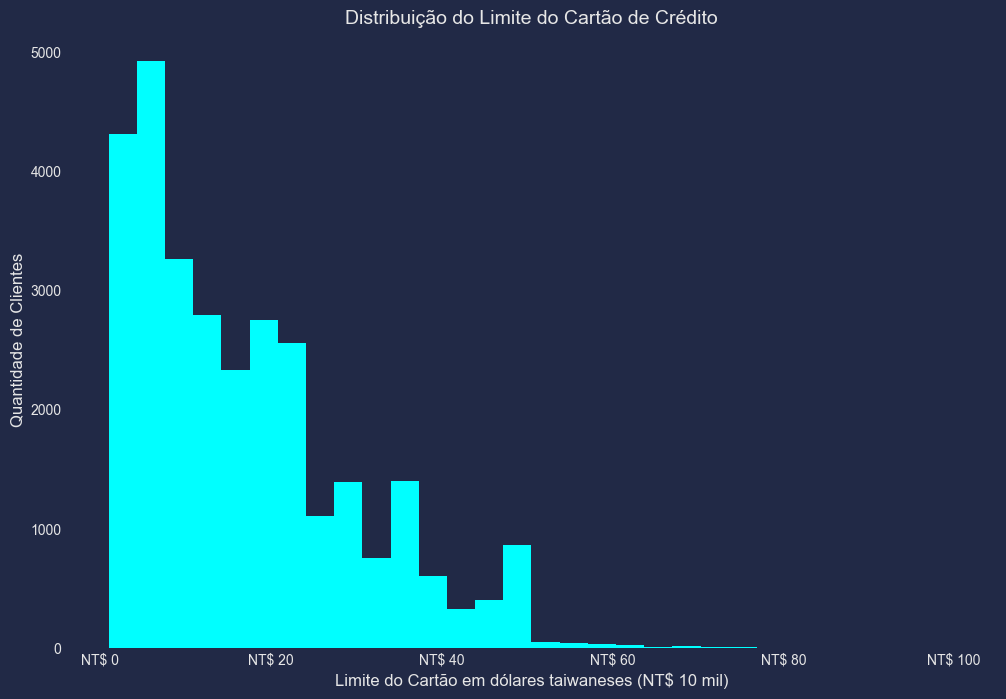

In [10]:
plt.figure(figsize=(12, 8))
dados_credito['limite_do_cartao'].hist(bins=30, color="cyan")

# Títulos e rótulos dos eixos
plt.title("Distribuição do Limite do Cartão de Crédito", fontsize=14)
plt.xlabel("Limite do Cartão em dólares taiwaneses (NT$ 10 mil)", fontsize=12)
plt.ylabel("Quantidade de Clientes", fontsize=12)

# Configurar o eixo x para exibir valores em dólares taiwaneses (NT$)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"NT$ {int(x/10000):,}"))
plt.grid(False)


plt.show()


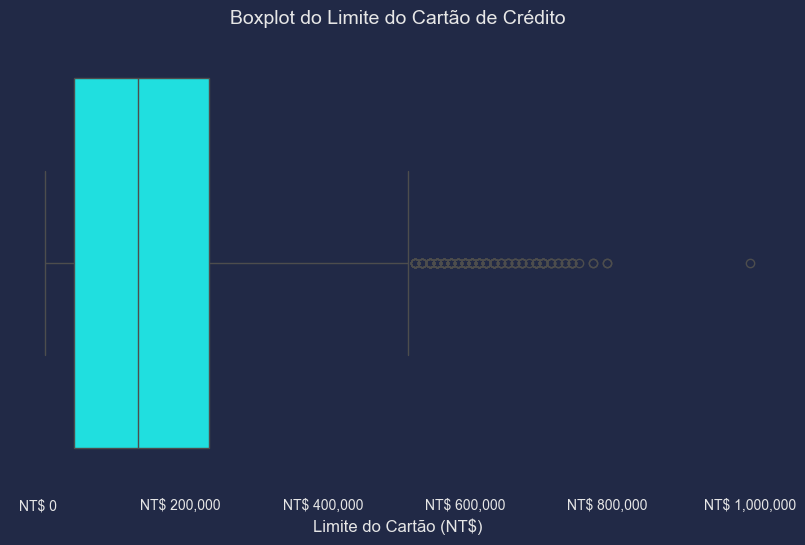

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados_credito['limite_do_cartao'], color="cyan")


plt.title("Boxplot do Limite do Cartão de Crédito", fontsize=14)
plt.xlabel("Limite do Cartão (NT$)", fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"NT$ {int(x):,}"))
plt.grid(False)

plt.show()


O boxplot do limite do cartão mostra que a maioria dos clientes possui limites concentrados entre NT$100.000 e NT$300.000, com mediana próxima de NT$200.000. A distribuição apresenta uma assimetria positiva, evidenciada por uma cauda longa à direita, indicando clientes com limites de crédito elevados como outliers. Esses limites mais altos (acima de NT$600.000) são destinados a uma pequena parcela de clientes, sugerindo uma política de crédito segmentada, onde limites elevados são restritos a clientes de perfil mais qualificado.

Neste próximo gráfico que desejamos mostrar, queremos identificar as correlações entre as colunas de nossa amostra, a fim de notar correlações fortes e fracas na amostra.

<Axes: >

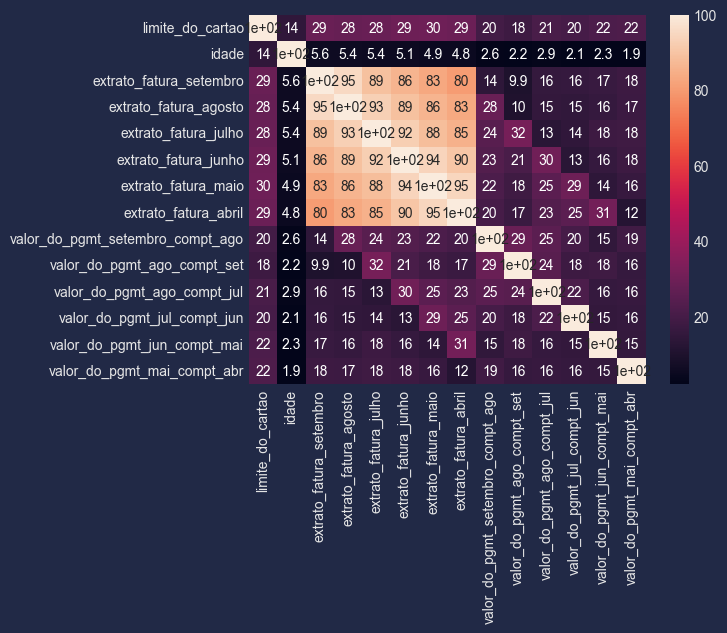

In [39]:
corr = dados_nao_binario_de_credito.corr()
corr[(corr >= 0.25) & (corr<1)]

sns.heatmap(round(corr *100, 2), annot=True)

Este heatmap de correlações revela fortes relações entre os valores das colunas de extrato das faturas de diferentes meses, com correlações acima de 0,90. Isso sugere que o comportamento de gasto dos clientes é relativamente estável ao longo dos meses. As colunas de pagamentos também apresentam correlações altas entre si, embora ligeiramente mais baixas, mostrando uma certa consistência nos valores pagos ao longo do tempo.

Já a correlação entre limite do cartão e idade é baixa, indicando pouca relação entre esses fatores e sugerindo que talvez o limite do cartão não é determinado diretamente pela idade do cliente. Esse padrão pode orientar modelos preditivos, destacando a importância de valores históricos de gastos e pagamentos.

In [13]:
var_categoricas =[]
var_continuas = []
for coluna in dados_credito.columns:
    if dados_credito[coluna].nunique() > 12:
        var_continuas.append(coluna)
    else:
        var_categoricas.append(coluna)
print(var_continuas)
print(var_categoricas)

['limite_do_cartao', 'idade', 'extrato_fatura_setembro', 'extrato_fatura_agosto', 'extrato_fatura_julho', 'extrato_fatura_junho', 'extrato_fatura_maio', 'extrato_fatura_abril', 'valor_do_pgmt_setembro_compt_ago', 'valor_do_pgmt_ago_compt_set', 'valor_do_pgmt_ago_compt_jul', 'valor_do_pgmt_jul_compt_jun', 'valor_do_pgmt_jun_compt_mai', 'valor_do_pgmt_mai_compt_abr']
['sexo', 'escolaridade', 'estado_civil', 'status_pagamento_setembro', 'status_pagamento_agosto', 'status_pagamento_julho', 'status_pagamento_junho', 'status_pagamento_maio', 'status_pagamento_abril', 'ira_dar_default']


IndexError: index 3 is out of bounds for axis 0 with size 3

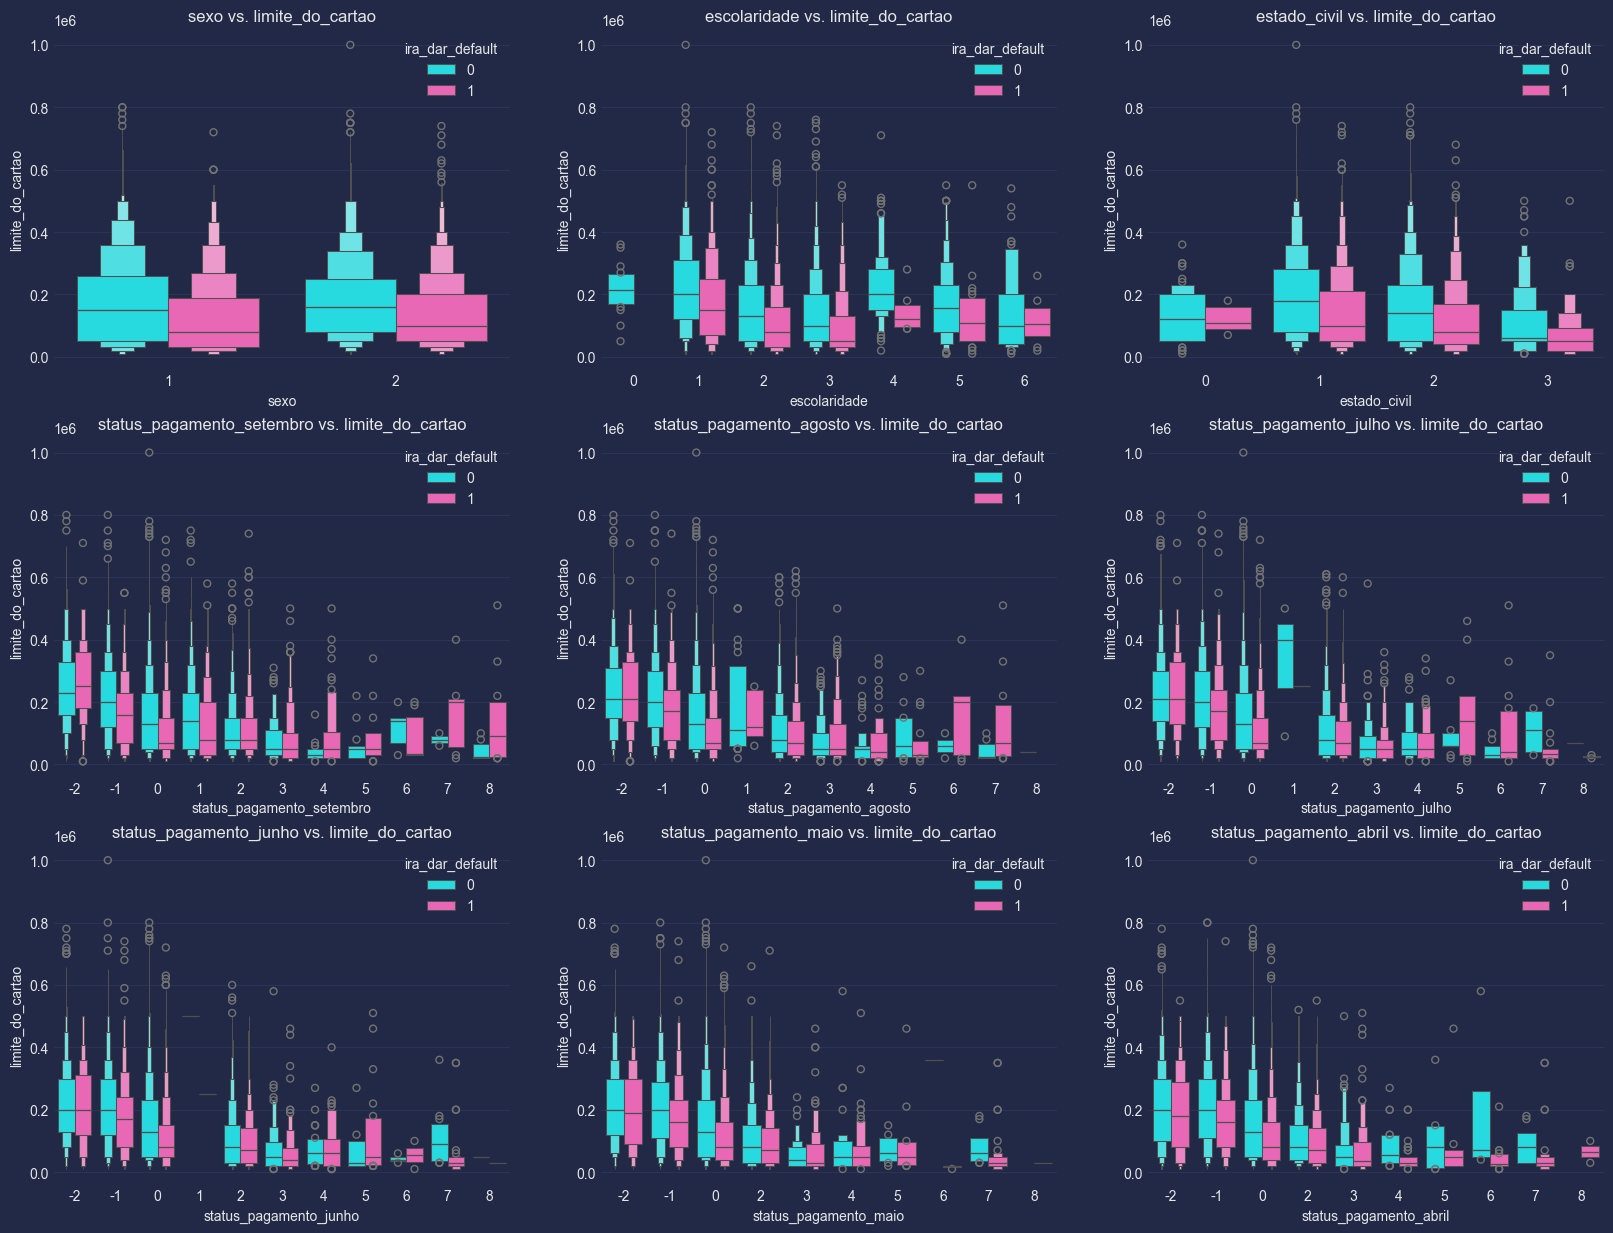

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, var_categoricas in enumerate(var_categoricas):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    sns.boxenplot(data=dados_credito, y='limite_do_cartao', x=var_categoricas, hue='ira_dar_default', ax=ax)
    ax.set_title(f'{var_categoricas} vs. limite_do_cartao')

plt.show()

## Análise dos Gráficos


* 1. Sexo (SEX) vs. LIMIT_BAL:

Observa-se que homens e mulheres têm distribuições similares de limite de crédito, com uma leve tendência de maior limite para aqueles que não darão default. O grupo "irá dar default" (laranja) tende a ter menores limites.

* 2. Educação (EDUCATION) vs. LIMIT_BAL:

Clientes com níveis de educação mais altos (0 e 1) têm limites de crédito medianos mais altos. A educação parece ter uma correlação leve com o limite de crédito, com limites mais baixos para clientes que apresentam tendência de default.

* 3. Status de Casamento (MARRIAGE) vs. LIMIT_BAL:

Clientes solteiros (categoria 3) parecem ter limites mais baixos, especialmente entre aqueles propensos ao default.

* 4. Status de Pagamento (status_pagamento_mês) vs. LIMIT_BAL:

Cada gráfico representa o status de pagamento (de -2 a 8) em um mês específico (abril a setembro). Status de pagamento alto (5 e acima) indica atraso significativo, e esses clientes frequentemente têm menores limites de crédito, especialmente entre os que têm probabilidade de default. Clientes com status de pagamento positivo (0, 1) tendem a ter limites mais altos, e entre eles, a propensão ao default é menor.


### Overview Geral
Os gráficos sugerem que o limite do cartão de crédito é influenciado por fatores como educação, status de casamento e histórico de pagamento. Clientes com melhores históricos de pagamento e maiores níveis de educação tendem a ter limites de crédito mais altos e menor probabilidade de default.

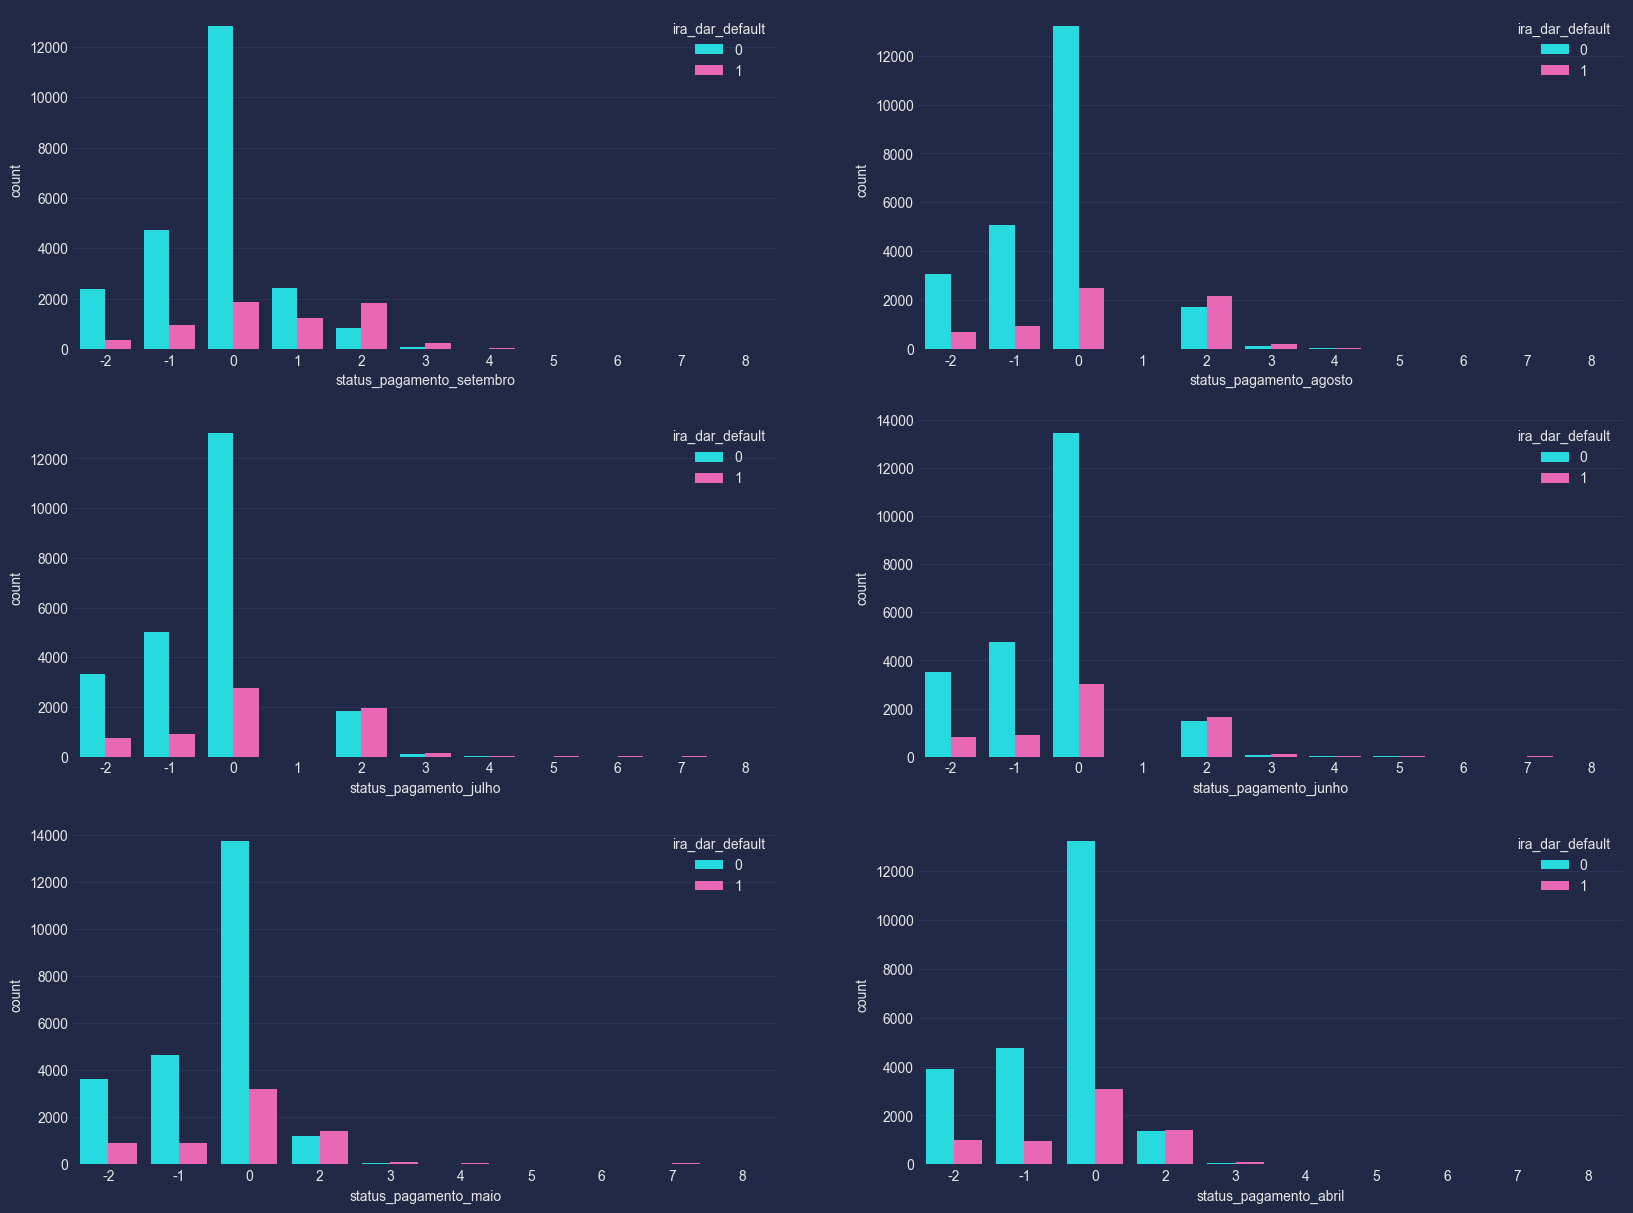

In [18]:
colunas_status_pagamento = dados_credito.loc[:,'status_pagamento_setembro': 'status_pagamento_abril'].columns
figure, axes = plt.subplots(3,2,figsize=(20,15))
for i,column in enumerate(colunas_status_pagamento):
    row , col = divmod(i,2)
    ax=axes[row,col]
    sns.countplot(data =dados_credito, x=column,hue='ira_dar_default',ax=ax)


### Observações a respeito da relação de status de pagamento com default:


* 1. Distribuição de Status de Pagamento: A maioria dos clientes possui status de pagamento -1 (antecipação) ou 0 (pagamento em dia) em todos os meses analisados, indicando que o comportamento mais comum é a pontualidade ou pagamento antecipado. Essa característica é consistente ao longo dos meses.

* 2. Associação com Default: Entre os clientes que irão dar default, há uma proporção maior de status de pagamento com valores positivos (1 ou mais), indicando atrasos. Isso sugere que clientes com históricos de pagamento em atraso têm maior probabilidade de default.

* 3. Tendência ao Longo dos Meses: A distribuição de clientes que irão dar default mantém-se relativamente estável ao longo dos meses, com pequenas variações. A maioria dos clientes com atraso de 1 a 3 meses se concentra nas categorias mais baixas de pagamento, e isso está associado a uma maior probabilidade de default.

* 4. Conclusão: Esses gráficos indicam uma forte correlação entre o atraso nos pagamentos e a probabilidade de default. A maioria dos clientes pontuais tende a não dar default, enquanto aqueles com histórico de atraso apresentam um risco maior. Essa análise pode ser usada para ajustar políticas de crédito, focando em comportamentos de pagamento para prever e mitigar riscos de default.

<Axes: xlabel='extrato_fatura_setembro', ylabel='limite_do_cartao'>

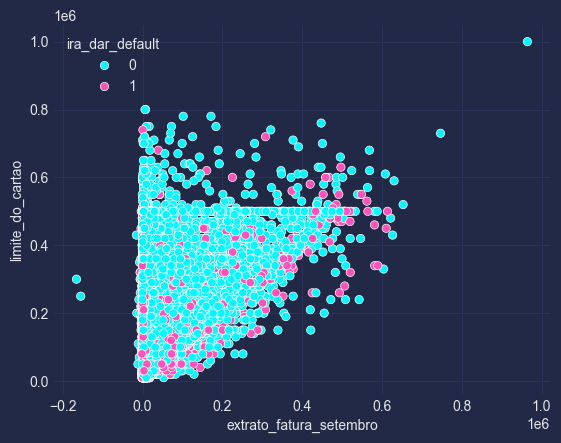

In [22]:

sns.scatterplot(
    data = dados_credito, x='extrato_fatura_setembro',y = 'limite_do_cartao', hue= 'ira_dar_default',
)

### Interpretações
* Os inadimplentes estão apresentando desempenho superior em um número muito grande
* Necessidade de equilibrar o conjunto de dados por meio de amostragem excessiva

In [29]:
df_smote = dados_credito.copy()

oversample = SMOTE()
X_input, y_output = df_smote.iloc[:,:-1], df_smote[['ira_dar_default']]
X,y = oversample.fit_resample(X_input, y_output)
df_smote = pd.concat([X, y], axis = 1)
df_smote

,limite_do_cartao,sexo,escolaridade,estado_civil,idade,status_pagamento_setembro,status_pagamento_agosto,status_pagamento_julho,status_pagamento_junho,status_pagamento_maio,...,extrato_fatura_junho,extrato_fatura_maio,extrato_fatura_abril,valor_do_pgmt_setembro_compt_ago,valor_do_pgmt_ago_compt_set,valor_do_pgmt_ago_compt_jul,valor_do_pgmt_jul_compt_jun,valor_do_pgmt_jun_compt_mai,valor_do_pgmt_mai_compt_abr,ira_dar_default
0,20000.000000,2,2,1,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.000000,2,2,2,26,-1,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.000000,2,2,2,34,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.000000,2,2,1,37,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.000000,1,2,1,57,-1,0,-1,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,300000.000000,2,1,2,33,-2,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
46724,294787.827813,1,1,1,43,2,0,0,0,0,...,284305.700742,254561.462651,242237.024389,6775.823842,10409.706858,10410.549966,8805.872697,8579.130362,9222.998853,1
46725,50000.000000,1,2,1,27,0,0,0,-1,-1,...,99.722312,263.525729,38.043230,2599.250289,971.907327,349.919027,277.687808,55.537562,249.919027,1
46726,20000.000000,1,2,2,25,2,1,1,1,1,...,146.568693,146.568693,1152.813672,0.000000,0.000000,0.000000,0.000000,1152.813672,0.000000,1


In [33]:
print('Tamanho de X: {}'.format(X.shape))
print('Tamanho de y: {}'.format(y.shape))
df_smote = pd.concat([X,y],axis=1)
print('Tamanho da distr. normal do dataset: {}'.format(df_smote.shape))

Tamanho de X: (46728, 23)
Tamanho de y: (46728, 1)
Tamanho da distr. normal do dataset: (46728, 24)


Depois de rebalancear o dataset, temos a seguinte relação entre o extrato de setembro e o limite do cartão para defaulters e non-defaulters:

<Axes: xlabel='extrato_fatura_setembro', ylabel='limite_do_cartao'>

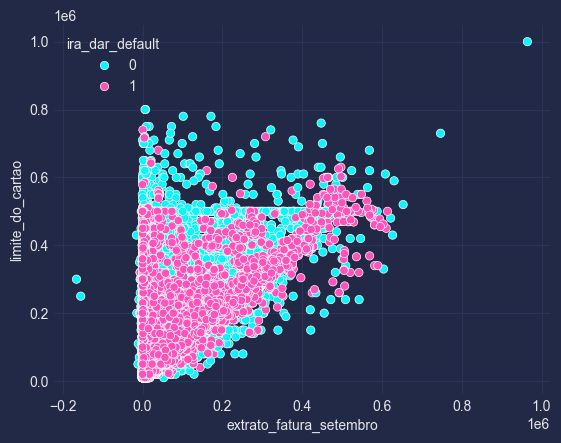

In [31]:
sns.scatterplot(
    data = df_smote, x='extrato_fatura_setembro',y = 'limite_do_cartao',hue = 'ira_dar_default'
)

Comparando os dados balanceados com os não-balanceados:

Text(0.5, 1.0, 'DADOS BALANCEADOS')

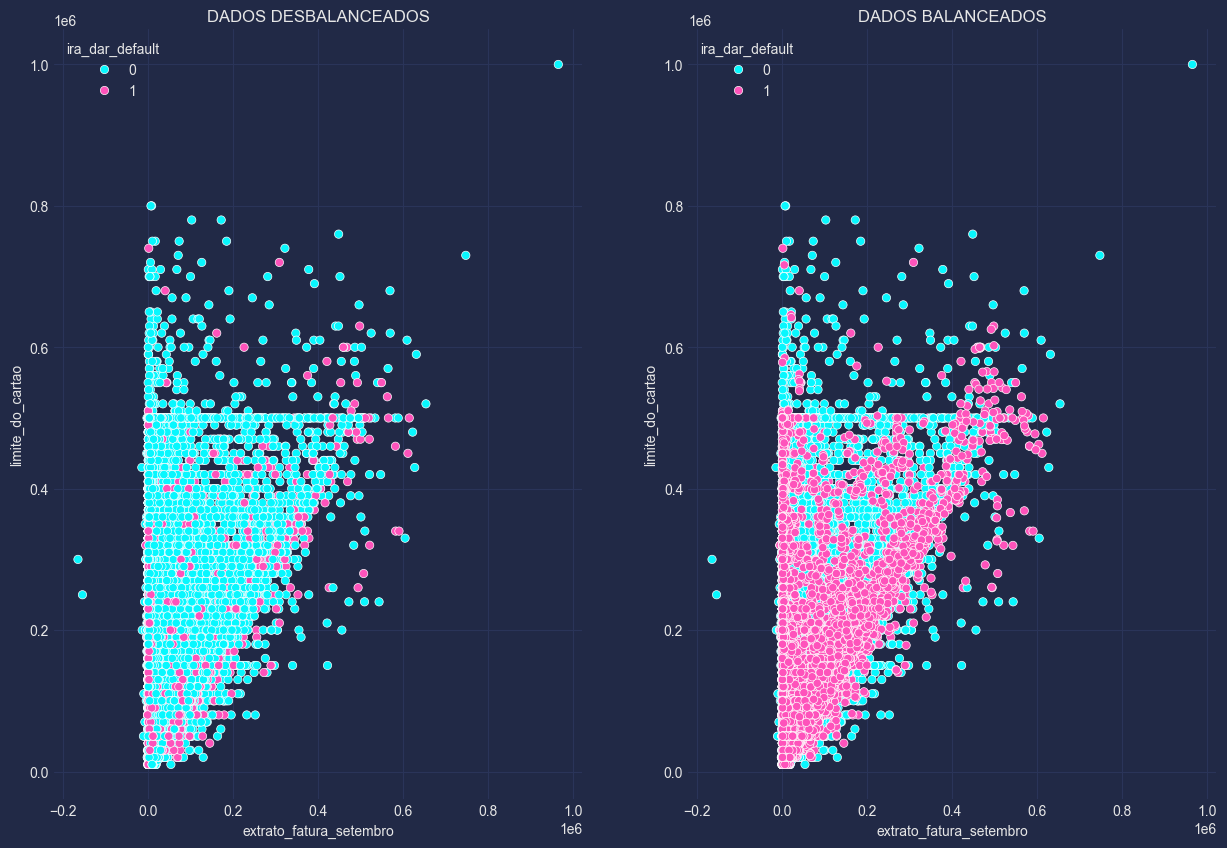

In [37]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
sns.scatterplot(
    data = dados_credito, x='extrato_fatura_setembro',y = 'limite_do_cartao', hue= 'ira_dar_default',ax=ax[0],
)
ax[0].set_title('DADOS DESBALANCEADOS')
sns.scatterplot(
    data = df_smote, x = 'extrato_fatura_setembro',y = 'limite_do_cartao' , hue = 'ira_dar_default',ax=ax[1]
)
ax[1].set_title('DADOS BALANCEADOS')

#### Considerações finais
* Influência do estado civil: Observa-se que, em geral, os usuários casados tendem a utilizar os serviços de crédito com mais frequência do que os solteiros.
* Impacto do casamento e da educação: Os usuários que pertencem à categoria de casados e têm formação de pós-graduação são notavelmente mais propensos a usar serviços de crédito em comparação com outras combinações de estado civil e níveis de escolaridade.
* Padrões de inadimplência: Os usuários que não têm formação superior, universitária ou de ensino médio tendem a apresentar uma taxa de inadimplência mais alta, de aproximadamente 30% a 40%, independentemente de seu estado civil.
Risco em usuários graduados com a categoria “Outros”: Os usuários graduados categorizados como “Outros” demonstram uma chance substancial de 50% de inadimplência nos pagamentos com cartão de crédito.




____________________________________________________________________________________________________________________________

## Dummies

* Como vamos trabalhar com dados de classificação em uma regressão, precisamos pegar dummies para os dados categóricos.
* Assim, conseguimos inserir um beta que vai multiplcar o valor da dummy e adicionar um valor à equação caso a pessoa em questão se enquandre em alguma classificação.
* Com dummies, nós conseguimos medir exatamente a sensibilidade adcionar uam variáveo ou não

  Y = A + B0X + B1 * D_c + B2 * D_s + E


Como as colunas 'education' e 'marriage' não eram dummies ainda, vamos torná-las dummies com as tres linhas de código a seguir:

In [44]:
dicionario_coluna_dummies = {
    'escolaridade': 'EDU',
    'estado_civil': 'MAR'
}

In [43]:
df_smote

,limite_do_cartao,sexo,escolaridade,estado_civil,idade,status_pagamento_setembro,status_pagamento_agosto,status_pagamento_julho,status_pagamento_junho,status_pagamento_maio,...,extrato_fatura_junho,extrato_fatura_maio,extrato_fatura_abril,valor_do_pgmt_setembro_compt_ago,valor_do_pgmt_ago_compt_set,valor_do_pgmt_ago_compt_jul,valor_do_pgmt_jul_compt_jun,valor_do_pgmt_jun_compt_mai,valor_do_pgmt_mai_compt_abr,ira_dar_default
0,20000.000000,2,2,1,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.000000,2,2,2,26,-1,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.000000,2,2,2,34,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.000000,2,2,1,37,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.000000,1,2,1,57,-1,0,-1,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,300000.000000,2,1,2,33,-2,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
46724,294787.827813,1,1,1,43,2,0,0,0,0,...,284305.700742,254561.462651,242237.024389,6775.823842,10409.706858,10410.549966,8805.872697,8579.130362,9222.998853,1
46725,50000.000000,1,2,1,27,0,0,0,-1,-1,...,99.722312,263.525729,38.043230,2599.250289,971.907327,349.919027,277.687808,55.537562,249.919027,1
46726,20000.000000,1,2,2,25,2,1,1,1,1,...,146.568693,146.568693,1152.813672,0.000000,0.000000,0.000000,0.000000,1152.813672,0.000000,1


In [55]:
for column, prefix in dicionario_coluna_dummies.items():

    dummies = pd.get_dummies(dados_credito[column], prefix = prefix)
    dados_bancarios = pd.concat([dados_credito, dummies], axis = 1)
    dados_bancarios = dados_bancarios.drop(column, axis = 1)

dados_bancarios

,limite_do_cartao,sexo,escolaridade,idade,status_pagamento_setembro,status_pagamento_agosto,status_pagamento_julho,status_pagamento_junho,status_pagamento_maio,status_pagamento_abril,...,valor_do_pgmt_ago_compt_set,valor_do_pgmt_ago_compt_jul,valor_do_pgmt_jul_compt_jun,valor_do_pgmt_jun_compt_mai,valor_do_pgmt_mai_compt_abr,ira_dar_default,MAR_0,MAR_1,MAR_2,MAR_3
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,24,2,2,-1,-1,-2,-2,...,689.0,0.0,0.0,0.0,0.0,1,False,True,False,False
2,120000.0,2,2,26,-1,2,0,0,0,2,...,1000.0,1000.0,1000.0,0.0,2000.0,1,False,False,True,False
3,90000.0,2,2,34,0,0,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,False,False,True,False
4,50000.0,2,2,37,0,0,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,False,True,False,False
5,50000.0,1,2,57,-1,0,-1,0,0,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,39,0,0,0,0,0,0,...,20000.0,5003.0,3047.0,5000.0,1000.0,0,False,True,False,False
29997,150000.0,1,3,43,-1,-1,-1,-1,0,0,...,3526.0,8998.0,129.0,0.0,0.0,0,False,False,True,False
29998,30000.0,1,2,37,4,3,2,-1,0,0,...,0.0,22000.0,4200.0,2000.0,3100.0,1,False,False,True,False


### Definido regressores e variável resposta

In [56]:
Y = dados_bancarios['ira_dar_default'].copy()
X = dados_bancarios.drop('ira_dar_default', axis = 1).copy()

## Pré-processamentos: amostras de treino e teste

In [57]:
X_train, X_test, y_traing, y_test = train_test_split(X, Y, train_size = 0.7)

In [58]:
escalador_treino = StandardScaler()
escalador_teste = StandardScaler()

X_train = pd.DataFrame(escalador_treino.fit_transform(X_train), columns = X.columns) # so precisa escalar as variáveis númericas
X_test = pd.DataFrame(escalador_teste.fit_transform(X_test), columns=X.columns)

X_train

,limite_do_cartao,sexo,escolaridade,idade,status_pagamento_setembro,status_pagamento_agosto,status_pagamento_julho,status_pagamento_junho,status_pagamento_maio,status_pagamento_abril,...,valor_do_pgmt_setembro_compt_ago,valor_do_pgmt_ago_compt_set,valor_do_pgmt_ago_compt_jul,valor_do_pgmt_jul_compt_jun,valor_do_pgmt_jun_compt_mai,valor_do_pgmt_mai_compt_abr,MAR_0,MAR_1,MAR_2,MAR_3
0,-0.210651,0.804560,0.183517,-1.239874,0.012954,0.110870,0.138187,0.186625,0.228565,0.246031,...,-0.223687,-0.122671,-0.200220,-0.223530,-0.224234,-0.013849,-0.045297,-0.916959,0.939449,-0.100504
1,1.169914,-1.242915,1.447080,-0.807600,-0.873133,0.110870,0.138187,-0.666287,-0.648924,0.246031,...,-0.145657,-0.249200,-0.144768,14.061859,0.226995,0.165106,-0.045297,-0.916959,0.939449,-0.100504
2,2.166989,0.804560,-1.080045,-0.483395,-1.759219,-1.552775,-1.527195,-1.519200,-1.526413,-1.481079,...,-0.333243,-0.249200,-0.284871,-0.304720,-0.313871,-0.291212,-0.045297,-0.916959,0.939449,-0.100504
3,0.939820,0.804560,-1.080045,1.245699,0.012954,0.110870,0.138187,0.186625,0.228565,0.246031,...,0.357649,0.214739,0.138386,0.263105,0.142584,0.041624,-0.045297,-0.916959,0.939449,-0.100504
4,-0.824235,0.804560,0.183517,-1.239874,0.012954,0.110870,0.138187,0.186625,0.228565,0.246031,...,-0.188097,-0.181718,-0.124141,-0.241977,-0.265117,-0.180267,-0.045297,1.090562,-1.064454,-0.100504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,1.783498,0.804560,0.183517,0.273084,-1.759219,-1.552775,-1.527195,-1.519200,-0.648924,0.246031,...,-0.333243,-0.249200,-0.284871,2.542181,-0.240243,-0.228583,-0.045297,-0.916959,0.939449,-0.100504
20996,0.326236,-1.242915,0.183517,-1.131806,0.012954,0.110870,-1.527195,-0.666287,0.228565,0.246031,...,-0.333243,-0.249200,-0.111282,7.538720,0.017488,-0.013128,-0.045297,-0.916959,0.939449,-0.100504
20997,0.249538,0.804560,0.183517,1.353768,-1.759219,-0.720953,1.803570,-0.666287,0.228565,0.246031,...,0.320318,-0.249200,0.053145,-0.304720,-0.116339,-0.291212,-0.045297,1.090562,-1.064454,-0.100504
20998,0.096141,0.804560,-1.080045,-0.051122,-0.873133,-0.720953,-0.694504,-0.666287,0.228565,0.246031,...,0.080305,-0.056496,1.650541,-0.304720,-0.313871,-0.291212,-0.045297,-0.916959,0.939449,-0.100504


## Treinando o modelo

In [59]:
model = LogisticRegression()
model.fit(X_train, y_traing)

LogisticRegression()

## Testando o modelo
### 1. Fazendo previsões de default.
* Em x% dos casos ele disse que ia dar default e realmente deu (acerto);
* bem como os casos em que ele disse que não ia dar default e realmente não deu (acerto).

In [60]:
"Acertos: {:.2f}%".format(model.score(X_test, y_test) * 100)

'Acertos: 82.19%'

In [61]:
# o que é a mesma coisa que fazer:

predict_default = model.predict(X_test)
predict_default

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score

rights = accuracy_score(y_test.values, predict_default)
rights

0.8218888888888889

In [63]:
1- rights

0.1781111111111111

### 2. Matriz de confusão

In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values, predict_default)
cm

array([[6913,  183],
       [1420,  484]], dtype=int64)

## Considerações
* Qual erro é pior: erro tipo I (perder dinheiro) ou erro tipo II (deixar de ganhar)
* Otimizar o modelo.
* ML é uma otimização de processo: o algoritmo é melhor do que existe hoje? Ele erra menos ou mais?
* No caso dos bancos, o erro tipo 1 é crucial para sua solvência financeira e lucratividade. Deixar de dar crédito para alugém que ia pagar é menor pior do que tomar default.
* Deixamos de ganhar em 1420 dos casos (equivalente a 17% do total do teste), mas ganhamos dinheiro em 76% do crédito total concedido, e evitamos perder 484 churns.

* Então nossa tomada de decisão é: o que é MENOS pior: perder 17% das oportunidades de lucro ou ter prejuízo (concessão errada de credito) em 1,93% do total de crédito concedido?